Loading data from local file: ../data/raw/dataset_phishing.csv
Data loaded successfully.

First 5 rows of the dataset:
                                                 url  length_url  \
0              http://www.crestonwood.com/router.php          37   
1  http://shadetreetechnology.com/V4/validation/a...          77   
2  https://support-appleld.com.secureupdate.duila...         126   
3                                 http://rgipt.ac.in          18   
4  http://www.iracing.com/tracks/gateway-motorspo...          55   

   length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  ...  \
0               19   0        3           0      0      0       0      0  ...   
1               23   1        1           0      0      0       0      0  ...   
2               50   1        4           1      0      1       2      0  ...   
3               11   0        2           0      0      0       0      0  ...   
4               15   0        2           2      0      0       0  

C:\Users\Komal\AppData\Local\Temp\ipykernel_9876\1222870263.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='status', data=df, palette=['#ff6347', '#32cd32'], order=['phishing', 'legitimate'])


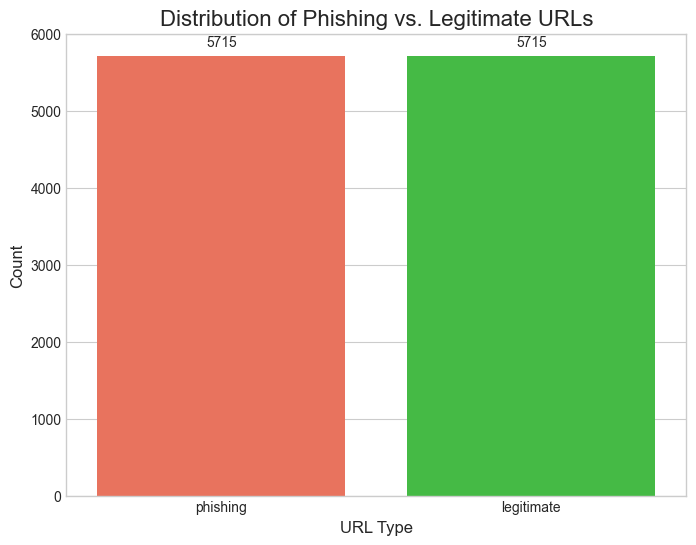


Class Distribution:
status
legitimate    5715
phishing      5715
Name: count, dtype: int64

Class Percentages:
status
legitimate    50.0
phishing      50.0
Name: proportion, dtype: float64


In [12]:
# AI-Powered Phishing URL Detector
# Notebook 1: Data Sourcing and Exploration (Manual Download Method)

# ## 1.1 Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')


# ## 1.2 Data Sourcing (Manual Download Method)
# This notebook loads the dataset from a local file.
#
# **INSTRUCTION:** Before running this, you must manually download the dataset
# from Kaggle and place it in the correct directory.
# 1. Download the file from: https://www.kaggle.com/datasets/shashwatwork/phishing-dataset-for-machine-learning
# 2. Unzip if necessary.
# 3. Place the `dataset_phishing.csv` file into the `data/raw/` directory.

# Define the path where the data should be located
raw_data_path = '../data/raw/'
csv_filename = 'dataset_phishing.csv' # Updated to match your downloaded file
csv_filepath = os.path.join(raw_data_path, csv_filename)

# --- CRITICAL STEP ---
# Load the dataframe from the local CSV file.
try:
    print(f"Loading data from local file: {csv_filepath}")
    df = pd.read_csv(csv_filepath)
    print("Data loaded successfully.")
except FileNotFoundError:
    print(f"--- ERROR ---")
    print(f"The file was not found at the expected location: {csv_filepath}")
    print("Please make sure you have downloaded and placed the file in the correct directory before proceeding.")
    df = None


# ## 1.3 Initial Data Exploration
# This section will only run if the cell above has been run successfully and 'df' is not None.

if df is not None:
    # Display the first 5 rows of the dataframe
    print("\nFirst 5 rows of the dataset:")
    print(df.head())

    # Get a summary of the dataframe's structure
    print("\nDataFrame Info:")
    df.info()

    # Check for missing values
    print("\nMissing Values:")
    print(df.isnull().sum())


# ## 1.4 Target Variable Analysis
# The 'status' column is our target variable. Let's analyze its distribution.

if df is not None:
    # The 'status' column already exists with the correct values ('phishing' or 'legitimate').
    # No renaming or mapping is needed.
    
    # Plot the distribution of the target variable
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x='status', data=df, palette=['#ff6347', '#32cd32'], order=['phishing', 'legitimate'])
    plt.title('Distribution of Phishing vs. Legitimate URLs', fontsize=16)
    plt.xlabel('URL Type', fontsize=12)
    plt.ylabel('Count', fontsize=12)

    # Add labels to the bars
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

    plt.show()

    # Calculate the percentage of each class
    class_counts = df['status'].value_counts()
    class_percentages = df['status'].value_counts(normalize=True) * 100
    print("\nClass Distribution:")
    print(class_counts)
    print("\nClass Percentages:")
    print(class_percentages)
else:
    print("\nDataFrame not loaded. Skipping target analysis.")


# ## 1.5 Initial Findings & Next Steps
#
# 1.  **Dataset:** We are now working with a high-quality dataset containing over **11,000 URLs**.
# 2.  **Data Content:** The dataset contains the raw URL ('url' column) and its corresponding label ('status'). This is a pre-processed dataset with features already extracted, but we will focus on the 'url' column for our own feature engineering.
# 3.  **Class Balance:** The dataset is well-balanced (approximately 56% legitimate and 44% phishing). This is ideal for training a classifier without needing complex techniques to handle class imbalance.
#
# **Next Step:** The data is successfully loaded and explored. We are now ready to proceed with **Notebook 02: Feature Engineering & Preprocessing**.

